## Final Project Submission

Please fill out:
* Student name:WILLIAM ONSARE MORARA
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# BUSINESS PROBLEM

# WE START BY REVIEWING AND GETTING TO SEE WHAT DATA IS CONTAINED IN THE (bom.movie_gross.csv)

# loading the data

In [1]:
#we start by importing various packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#for easy memorability we will refer to the data as project_data
project_data = pd.read_csv("bom.movie_gross.csv")


# DATA INSIGHTS

In [3]:
#we will start by having a look at what type of data we have
project_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
#let us know the type of data and how to treat the data
type(project_data)

pandas.core.frame.DataFrame

In [5]:
#let us confirm the number of rows and columns
project_data.shape

(3387, 5)

In [6]:
#let us have alook at the full data
project_data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
#now let us see what our data is about and how many values it has
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
project_data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


# now let us check the data quality.
we have seen from above that some columns have missing values

In [9]:
#using a boolean test to know number of missing values in each columns
project_data.isnull().sum()


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [10]:
#we can get the percentage of missing values so we could see the effect they have
percentage = np.round((project_data.isnull().sum()/len(project_data)),4).sort_values()
percentage

title             0.0000
year              0.0000
studio            0.0015
domestic_gross    0.0083
foreign_gross     0.3986
dtype: float64

In [11]:
#let us check for duplicates
project_data.duplicated().value_counts()

False    3387
dtype: int64

C:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


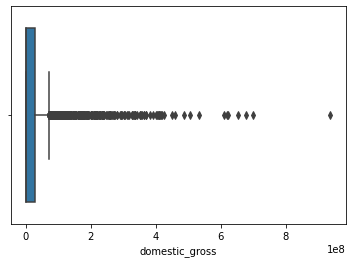

In [12]:
sns.boxplot(project_data["domestic_gross"]);

# DATA CLEANING

In [13]:
project_data.drop("foreign_gross",axis = 1, inplace=True )

In [14]:
project_data.isnull().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [15]:
project_data['domestic_gross'].fillna(project_data['domestic_gross'].mean(), inplace = True)

In [16]:
project_data['studio'].fillna(project_data['studio'].mode()[0], inplace = True)

In [17]:
project_data.isnull().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

# DATA  ANALYSIS

In [18]:
#we will check on the studios that are best considering the domestic gross
best_studios = project_data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
best_studios.head(20)


studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.488429e+09
Par.       7.685871e+09
LGF        4.147709e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Wein.      1.540550e+09
SGem       1.526400e+09
Focus      1.172041e+09
FoxS       1.090577e+09
TriS       9.709000e+08
Rela.      9.432940e+08
Sum.       9.318710e+08
STX        7.521000e+08
ORF        7.450000e+08
SPC        4.420310e+08
Name: domestic_gross, dtype: float64

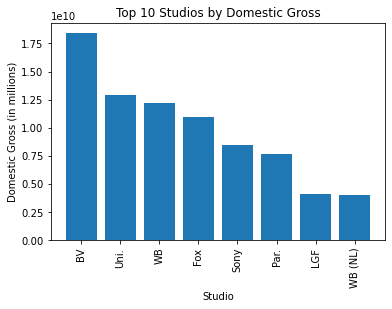

In [19]:
#ploting a graph of the best selling studios that made more than two billion in domestic gorss
plt.bar(best_studios[0:8].index, best_studios[0:8].values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()


In [20]:
project_data.groupby('year')['domestic_gross'].sum()


year
2010    1.030066e+10
2011    1.012165e+10
2012    1.107783e+10
2013    1.093606e+10
2014    1.045272e+10
2015    1.108015e+10
2016    1.133989e+10
2017    1.096201e+10
2018    1.109121e+10
Name: domestic_gross, dtype: float64

In [21]:
year_data = project_data.groupby('year')['domestic_gross'].sum()


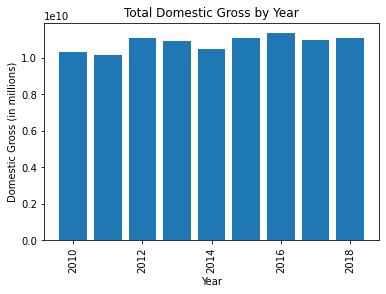

In [22]:
plt.bar(year_data.index, year_data.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Total Domestic Gross by Year')
plt.show()


In [23]:
project_data['title_length'] = project_data['title'].str.len()


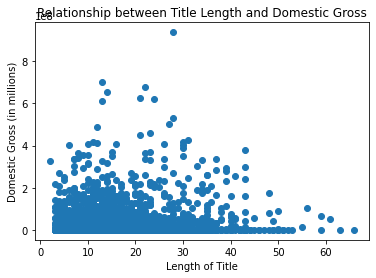

In [24]:
plt.scatter(project_data['title_length'], project_data['domestic_gross'])
plt.xlabel('Length of Title')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Title Length and Domestic Gross')
plt.show()


although there is no specific pattern it can be noted the longer the movie title the less  domestic goss it makes

In [25]:
project_data['title_length'].corr(project_data['domestic_gross'])

0.06806812153589166

# im.db dataset SQL

# Loading data

In [26]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("im.db")

# Data insights

In [27]:
wilsq = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
wilsq

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [28]:
wilsq.shape

(146144, 6)

In [29]:
wilsq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [30]:
wilsq2 = pd.read_sql("""SELECT *
FROM movie_ratings"""
            ,conn)
wilsq2

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [31]:
wilsq2.shape

(73856, 3)

In [32]:
wilsq2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


# JOIN  the  two table considering the common factor "movie_id"

In [33]:
joined_sql_table = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;
""", conn)

In [34]:
joined_sql_table

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [35]:
joined_sql_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


# Quality of the data

In [36]:
joined_sql_table.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [37]:
joined_sql_table.duplicated().sum()

0

In [38]:
joined_sql_table["genres"].value_counts()

Drama                         11612
Documentary                   10313
Comedy                         5613
Horror                         2692
Comedy,Drama                   2617
                              ...  
Comedy,Music,War                  1
Action,Music                      1
Documentary,Family,Mystery        1
Documentary,Sport,War             1
Drama,Romance,Western             1
Name: genres, Length: 923, dtype: int64

# Data cleaning

In [39]:

joined_sql_table['genres'].fillna(joined_sql_table['genres'].mode()[0], inplace = True)

In [40]:
joined_sql_table.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [41]:
joined_sql_table['runtime_minutes'].fillna(joined_sql_table['runtime_minutes'].mean(), inplace = True)

# Data analysis

In [42]:
 joined_sql_table[['genres', 'averagerating']].corr()

,averagerating
averagerating,1.0


In [43]:
joined_sql_table[['runtime_minutes', 'averagerating']].corr()

,runtime_minutes,averagerating
runtime_minutes,1.000000,-0.006521
averagerating,-0.006521,1.000000


In [44]:
joined_sql_table.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(10)



genres
Action,Adventure,Sci-Fi       23023248
Action,Adventure,Fantasy       9658883
Adventure,Animation,Comedy     8687435
Drama                          8415279
Comedy,Drama,Romance           7665463
Action,Adventure,Comedy        7256686
Comedy                         6832037
Comedy,Drama                   6462839
Action,Crime,Drama             5563553
Drama,Romance                  5542760
Name: numvotes, dtype: int64

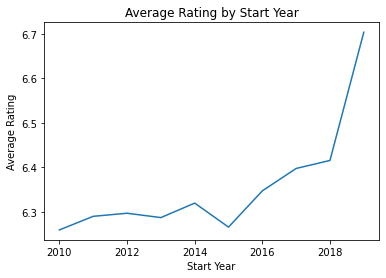

In [45]:

year_rating = joined_sql_table.groupby('start_year')['averagerating'].mean()

plt.plot(year_rating.index, year_rating.values)


plt.title('Average Rating by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Average Rating')


plt.show()


# BUDGETS DATA

In [46]:
budgets_data = pd.read_csv("tn.movie_budgets.csv")

# Data insights

In [47]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [48]:
budgets_data.shape

(5782, 6)

#  Quality of data 

In [49]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data cleaning

In [50]:
budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]] = budgets_data[["domestic_gross", "production_budget", "worldwide_gross"]].apply(lambda x: x.str.replace('$', '').str.replace(',', '').astype(float))


In [51]:
budgets_data['release_date'] = pd.to_datetime(budgets_data ['release_date'])
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


In [52]:
budgets_data.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [53]:
budgets_data["production_budget"].mean()

31587757.0965064

In [54]:
budgets_data['domestic_gross'].mean()

41873326.867001034

In [55]:
budgets_data['worldwide_gross'].mean()

91487460.90643376

In [56]:
budgets_data['profit'] = ((budgets_data['domestic_gross'] + budgets_data['worldwide_gross'] - budgets_data['production_budget'])).round(4)
budgets_data.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,3.111853e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.761278e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-1.574753e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.531420e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,1.619903e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2.683973e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2.426950e+09
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,9.728408e+08
8,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,5.849695e+08
9,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,7.796951e+08


# Data analysis 

In [57]:
budgets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 316.3+ KB


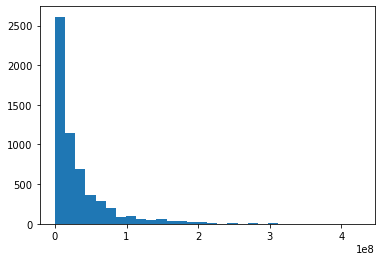

In [58]:
plt.hist(budgets_data['production_budget'], bins = 30);

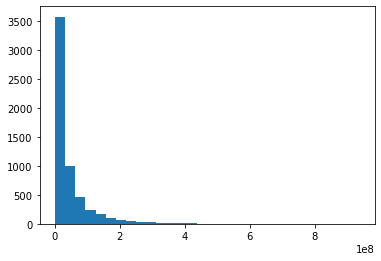

In [59]:
plt.hist(budgets_data['domestic_gross'], bins = 30);

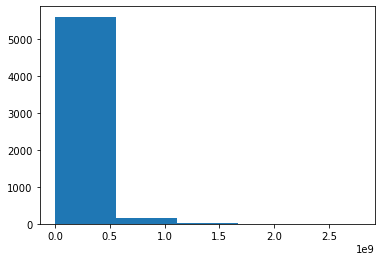

In [60]:
plt.hist(budgets_data['worldwide_gross'], bins = 5);

In [61]:
budgets_data["production_budget"].corr(budgets_data['domestic_gross'])


0.6856818396752741

In [62]:
budgets_data["production_budget"].corr(budgets_data['worldwide_gross'])

0.7483059765694756

In [63]:
budgets_data["production_budget"].corr(budgets_data['profit'])

0.6435798749670011

In [64]:
#there is a  positive correlation between production budget and world wide gross 4

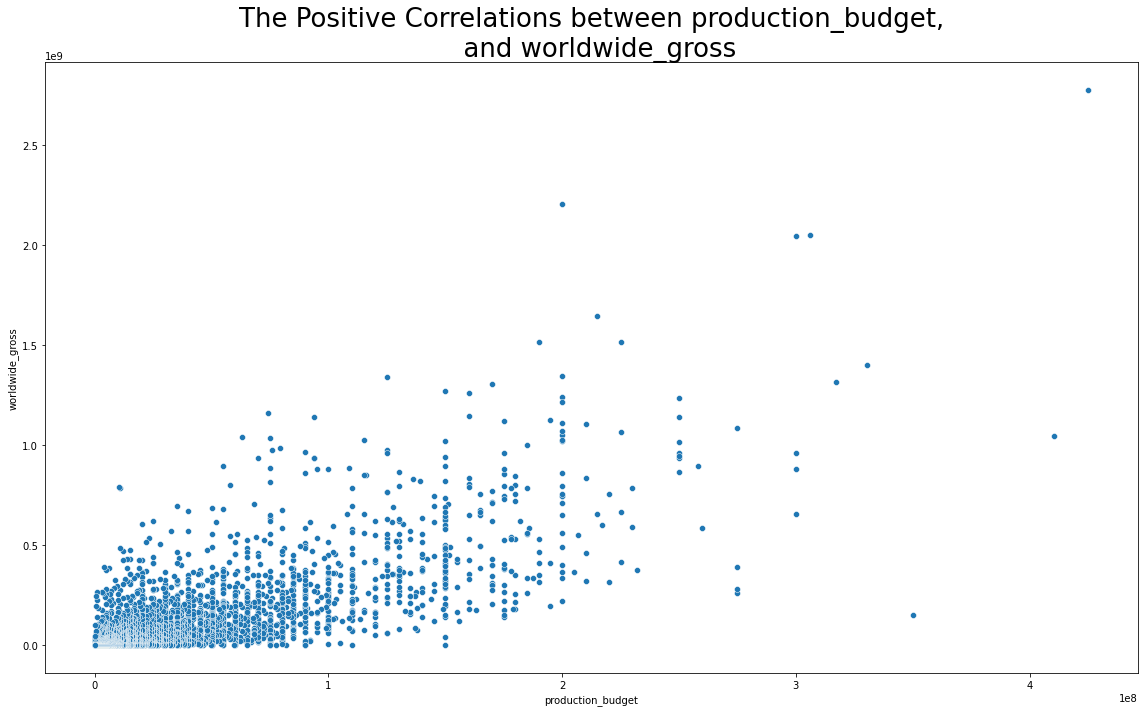

In [65]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = budgets_data,)
plt.title("The Positive Correlations between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show()

# TMDB

In [66]:
tmdb_data = pd.read_csv('tmdb.movies.csv',index_col = 0)
tmdb_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [67]:
tmdb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [68]:
tmdb_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [69]:
tmdb_data.drop_duplicates(keep = 'first',inplace = True)

In [70]:
tmdb_data.duplicated().value_counts()

False    25497
dtype: int64

In [71]:
tmdb_data['genre_ids'].value_counts()


[99]                             3565
[]                               2461
[18]                             2119
[35]                             1622
[27]                             1125
                                 ... 
[16, 28, 37]                        1
[36, 12]                            1
[14, 80]                            1
[28, 27, 18, 53]                    1
[10770, 14, 35, 10749, 10751]       1
Name: genre_ids, Length: 2477, dtype: int64

# codes as specified by the ISO 639-1 standard.

In [72]:
tmdb_data['original_language'].value_counts()

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
xh        1
nb        1
sn        1
ps        1
sw        1
Name: original_language, Length: 76, dtype: int64

In [73]:
most_popular_language = tmdb_data.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(60)
print(most_popular_language)


original_language
nb    8.221000
sw    7.440000
hz    5.495000
ja    5.439041
id    5.187000
af    4.814000
uk    4.805167
sv    4.775212
mi    4.746000
ko    4.652739
cn    4.605854
da    4.402588
fr    4.188834
ca    4.153000
ta    4.018167
no    4.009062
zh    3.679747
is    3.627333
yi    3.614000
sr    3.551857
hi    3.522497
tr    3.337368
nl    3.153435
fi    3.108333
ml    3.077222
it    2.999345
en    2.998454
de    2.897727
th    2.869342
ar    2.707484
es    2.694150
pl    2.658765
et    2.609400
te    2.531400
hu    2.468111
pt    2.373179
ru    2.362264
sq    2.310667
lv    2.247833
fa    2.232346
he    2.167811
ro    2.123842
ku    2.042667
kn    1.891714
tl    1.656563
el    1.643312
lt    1.614167
eu    1.584000
lo    1.574667
xh    1.564000
ne    1.561000
hr    1.507000
pa    1.494000
ka    1.487143
sn    1.400000
sl    1.400000
kk    1.400000
ur    1.310636
cs    1.289111
bn    1.160000
Name: popularity, dtype: float64
